## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


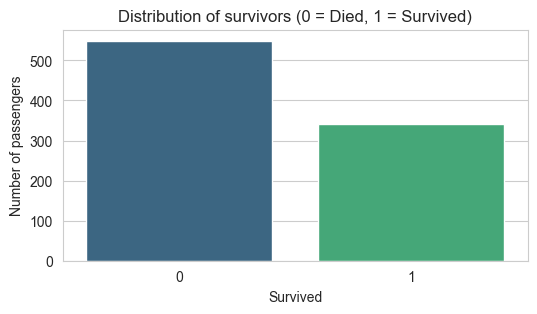

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.62
1    38.38
Name: count, dtype: float64


In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 3))

sns.countplot(data=df, x='Survived', palette='viridis', hue='Survived', legend=False)

plt.title("Distribution of survivors (0 = Died, 1 = Survived)")
plt.ylabel("Number of passengers")
plt.xlabel("Survived")

plt.show()

survived = df['Survived'].value_counts()
print(survived)
survived_percent = round((df['Survived'].value_counts() / len(df['Survived']) * 100), 2)
print(survived_percent)

### Conclusion
The dataset is imbalanced, with only 38% of passengers surviving. This is an important consideration for modeling, as accuracy alone would not be an appropriate evaluation metric. Instead, metrics such as precision, recall, and the F1-score should be used to better assess model performance.

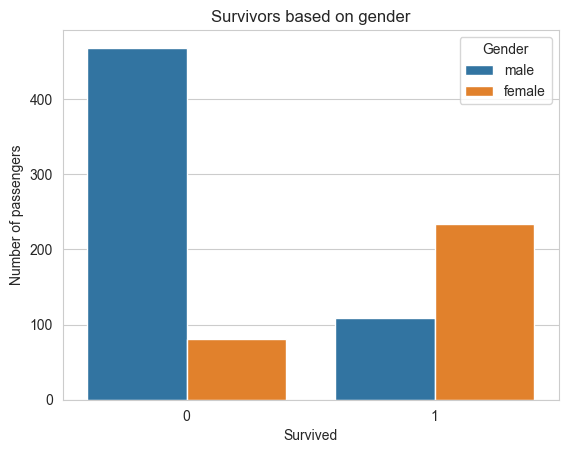

Sex
male      577
female    314
Name: count, dtype: int64


In [8]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survivors based on gender")
plt.ylabel("Number of passengers")
plt.legend(title='Gender')

plt.show()
print(df['Sex'].value_counts())

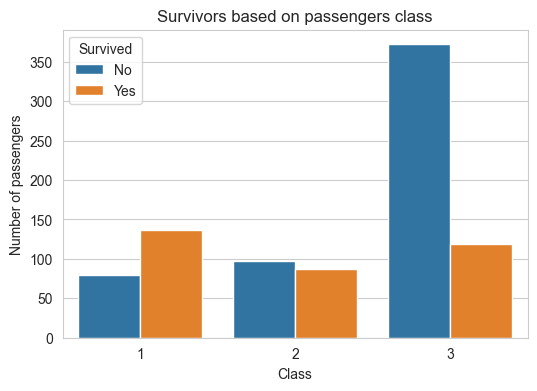

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survivors based on passengers class")
plt.xlabel("Class")
plt.ylabel("Number of passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

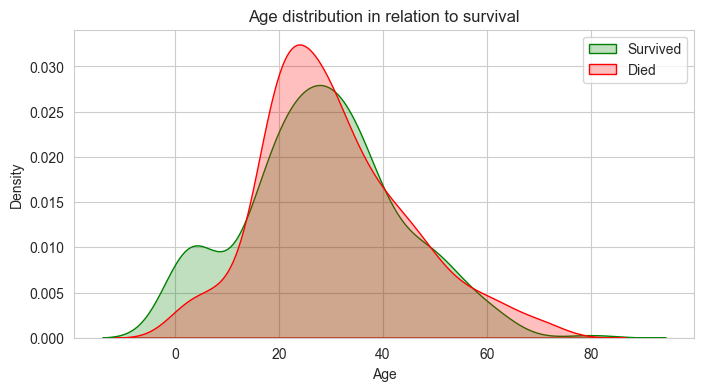

In [10]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label='Survived', color='green')
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label='Died', color='red')

plt.title('Age distribution in relation to survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Conclusion
We can observe that gender, passenger class, and age significantly affect survival outcomes:
1. Females had a higher survival rate than males.
2. Passengers in higher classes had a greater chance of survival.
3. Children had a survival advantage compared to adults.

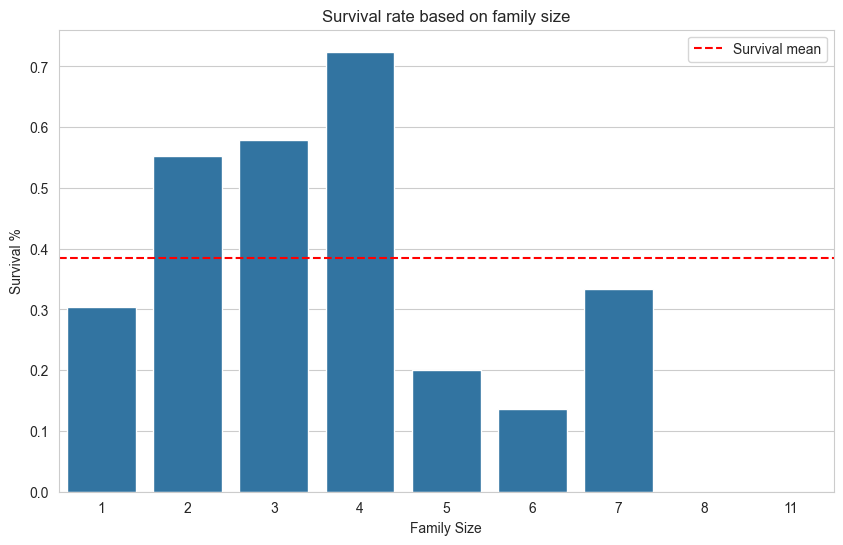

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)

plt.title('Survival rate based on family size')
plt.xlabel('Family Size')
plt.ylabel('Survival %')
plt.axhline(df['Survived'].mean(), color='red', linestyle='--', label='Survival mean')
plt.legend()
plt.show()

## Conclusion 
The bar plot shows the survival probability for each category. We can observe that being in a 'Small Family' (2-4 members) gave passengers the highest statistical chance of survival, significantly higher than the overall average (red dashed line).

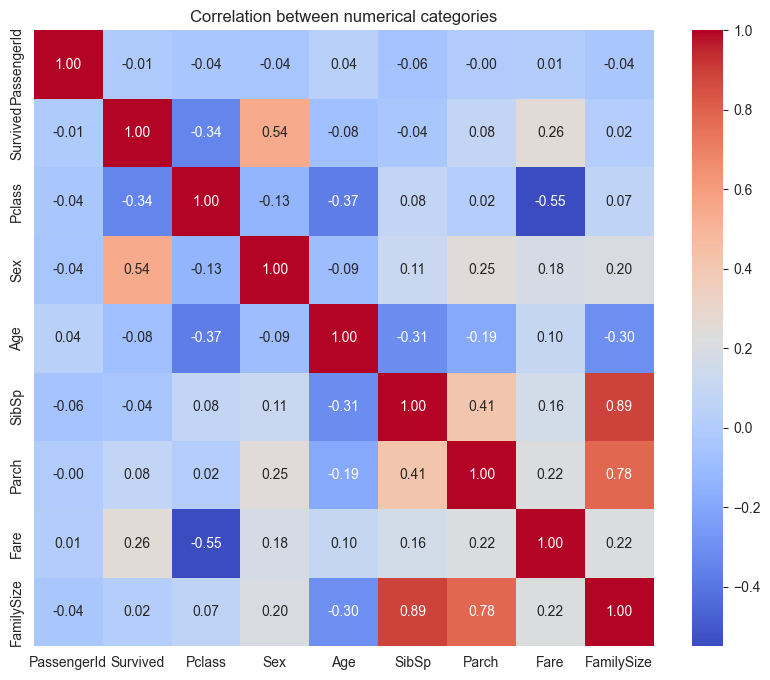

In [12]:
temp_df = df.copy()
temp_df['Sex'] = temp_df['Sex'].map({'male': 0, 'female': 1})
temp_df.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between numerical categories')
plt.show()

### Conclusion
Based on the correlation analysis, Sex, Pclass, and Fare show a noticeable relationship with the survival outcome, while Age exhibits a weak correlation. This does not imply that age has no impact on survival, but rather that its relationship with the target variable is not linear. In practice, age influences survival in a non-linear manner, as children had a higher chance of survival compared to adults.